## Conda environmental  

conda create -n dastools python=3.10

conda activate dastools

requirements:  
 - h5py==2.10.0
 - nptdms==1.6.0
 - numpy==1.18.5
 - scipy==1.5.0
 - segyio==1.9.9

conda install numpy scipy h5py nptdms segyio

conda install -n dastools ipykernel --update-deps --force-reinstall


In [ ]:
# !pip install -r requirements.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp

import glob
from scipy import signal

import os

with open('das_params.txt', 'r') as f:
    das_params = f.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'das_params.txt'

### Read metadata from the data file

In [3]:
fname = '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_233711.282.h5'
metadata = dp.read_das(fname, metadata=True)

for key in metadata.keys():
    print(key, ':', metadata[key])

dt : 0.0025
nt : 12000
dx : 4.083807945251465
nch : 5632
GL : 10.0
headers : {'AcquisitionDescription': b'', 'AcquisitionId': b'e4c8c4a6-0bf3-80e5-75c9-b6beb7ae6465', 'FacilityId': array([b'TBD'], dtype='|S3'), 'GaugeLength': 10.0, 'GaugeLength.uom': b'm', 'MaximumFrequency': 200.0, 'MaximumFrequency.uom': b'Hz', 'MeasurementStartTime': b'2024-08-13T06:10:41.282192+00:00', 'MinimumFrequency': 0.0, 'MinimumFrequency.uom': b'Hz', 'NumberOfLoci': 5632, 'PulseRate': 2000.0, 'PulseRate.uom': b'Hz', 'PulseWidth': 50.0, 'PulseWidth.uom': b'ns', 'ServiceCompanyName': b'Silixa', 'SpatialSamplingInterval': 4.083807945251465, 'SpatialSamplingInterval.uom': b'm', 'StartLocusIndex': 0, 'TriggeredMeasurement': False, 'schemaVersion': b'2.1', 'uuid': b'45a381c5-6013-4e87-9a92-3808c702c615'}


### Concatenate and decimate data

In [8]:
flist = glob.glob(os.path.join(das_params[0],'*.h5'))
flist.sort()
flist

['/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_233711.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_233741.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_233811.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_233841.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_233911.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_233941.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_234011.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816/XFJ_23km_GL_10m_frq_400Hz_sp_4m_UTC_20240815_234041.282.h5',
 '/Users/bluo/Drive/SUSTech/DAS_2024/EQ_Hualian_20240816

In [9]:
metadata = dp.read_das(flist[0], metadata=True)

for key in metadata.keys():
    print(key, ':', metadata[key])
    
    
dt = metadata['dt']
dx = metadata['dx']

dt : 0.0025
nt : 12000
dx : 4.083807945251465
nch : 5632
GL : 10.0
headers : {'AcquisitionDescription': b'', 'AcquisitionId': b'e4c8c4a6-0bf3-80e5-75c9-b6beb7ae6465', 'FacilityId': array([b'TBD'], dtype='|S3'), 'GaugeLength': 10.0, 'GaugeLength.uom': b'm', 'MaximumFrequency': 200.0, 'MaximumFrequency.uom': b'Hz', 'MeasurementStartTime': b'2024-08-13T06:10:41.282192+00:00', 'MinimumFrequency': 0.0, 'MinimumFrequency.uom': b'Hz', 'NumberOfLoci': 5632, 'PulseRate': 2000.0, 'PulseRate.uom': b'Hz', 'PulseWidth': 50.0, 'PulseWidth.uom': b'ns', 'ServiceCompanyName': b'Silixa', 'SpatialSamplingInterval': 4.083807945251465, 'SpatialSamplingInterval.uom': b'm', 'StartLocusIndex': 0, 'TriggeredMeasurement': False, 'schemaVersion': b'2.1', 'uuid': b'45a381c5-6013-4e87-9a92-3808c702c615'}


In [12]:
%%time
# datalist = []

# for fname in flist:
#     datalist.append(dp.read_das(fname))

# data = np.concatenate(datalist, axis=1)

data = np.concatenate([dp.read_das(fname) for fname in flist], axis=1)

CPU times: user 1.45 s, sys: 2.05 s, total: 3.51 s
Wall time: 4.1 s


In [13]:
print(data.shape)

(5632, 144000)


In [14]:
%%time
M = 10
data = signal.decimate(data, M, axis=1)
dt *= M

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [15]:
print(data.shape)

(5632, 14400)


In [16]:
# preprocessing / common-mode noise removal
data1 = dp.das_preprocess(data)
# data1 = dp.tapering(data1, alpha=0.2)
# data1 = dp.lowpass(data1, dt=metadata['dt'], fh=10)

<IPython.core.display.Javascript object>


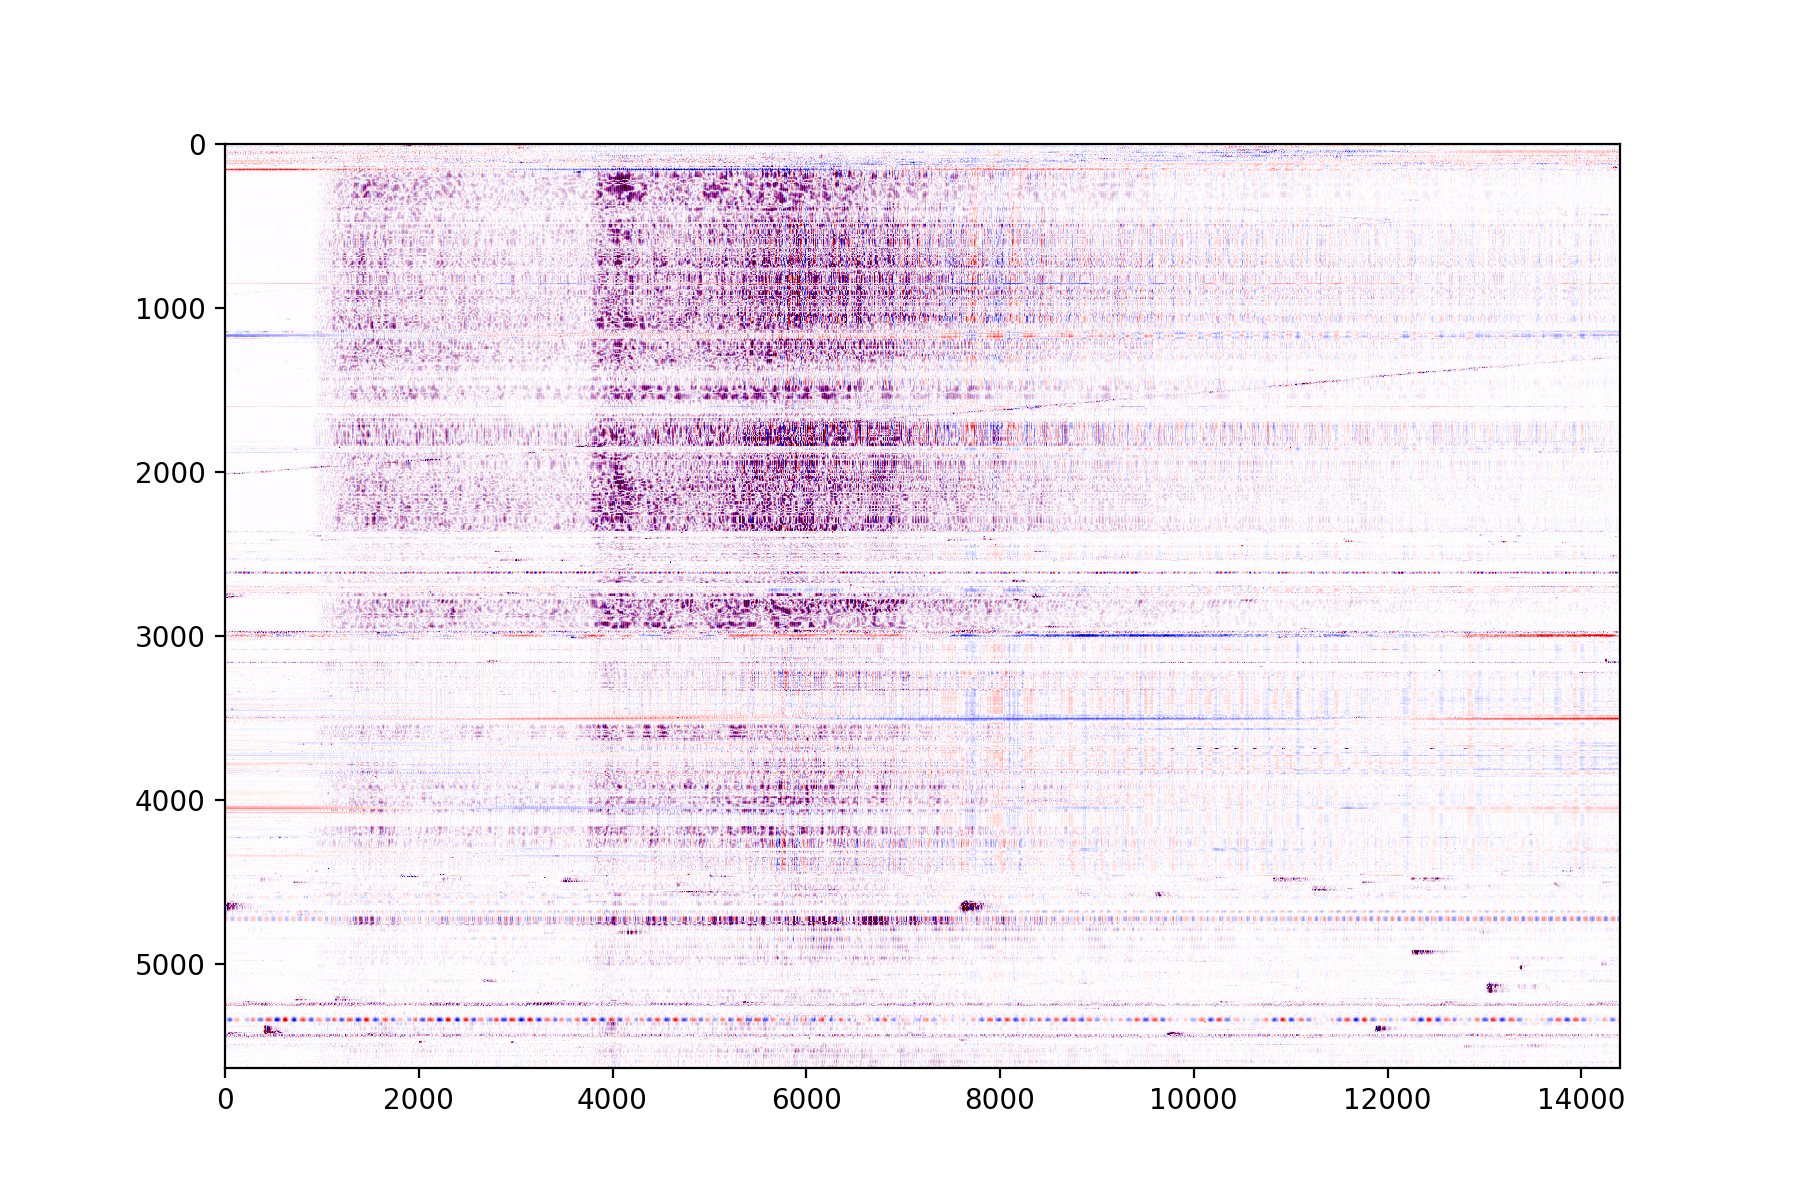

In [17]:
%matplotlib notebook

plt.figure(figsize=[9,6])

data_plot = data1[:, :]

data_plot /= data_plot.std(axis=1, keepdims=True)
clim = data_plot.std() * 3
plt.imshow(data_plot, aspect='auto', cmap='seismic', vmin=-clim, vmax=clim)

In [18]:
Spg_all = []

for i in range(200, 2200):
    trace = data[i,:] / data[i,:].std()

    f1, t1, Spg = signal.spectrogram(trace, 1./dt, nperseg=300, noverlap=300*0.9)
    
    Spg_all.append(Spg)

Spg_all = np.array(Spg_all).mean(axis=0)

<IPython.core.display.Javascript object>


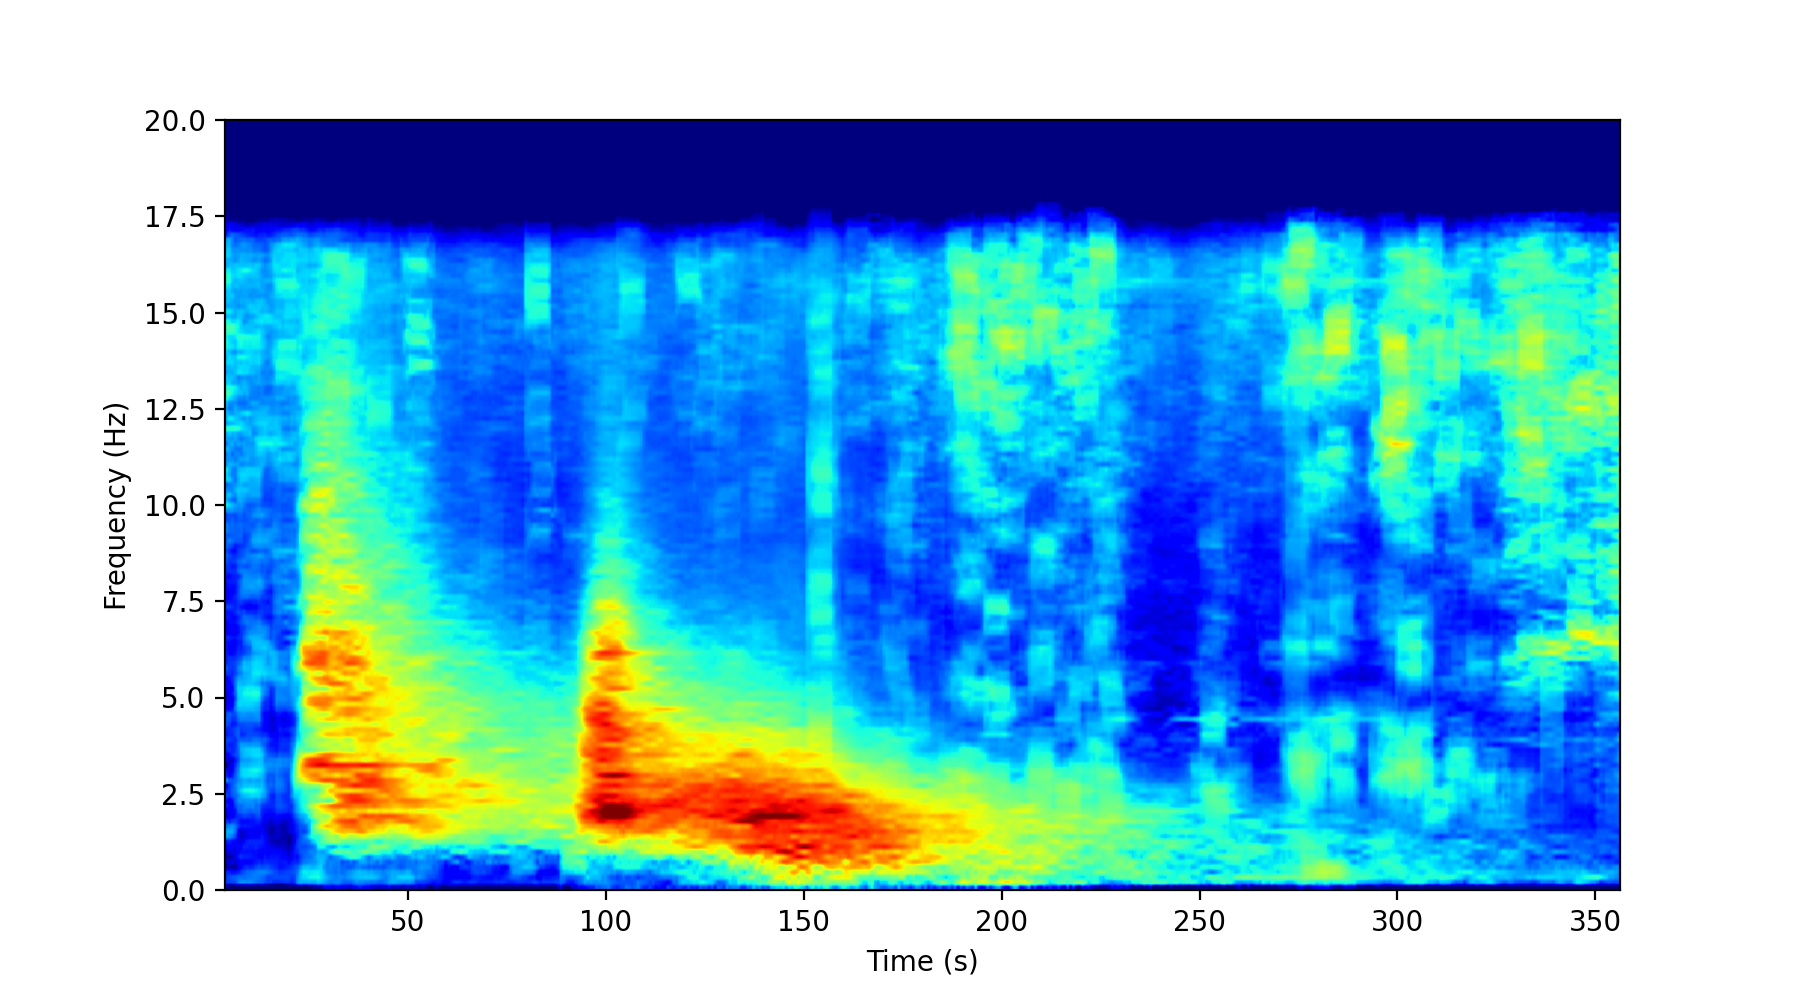

In [19]:
plt.figure(figsize=[9,5])
clim = np.log10(Spg_all).max()
plt.imshow(np.log10(Spg_all), aspect='auto', cmap='jet', vmin=-3, vmax=0.5, 
           origin='lower', extent=[t1[0], t1[-1], f1[0], f1[-1]])

plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.show()

<IPython.core.display.Javascript object>


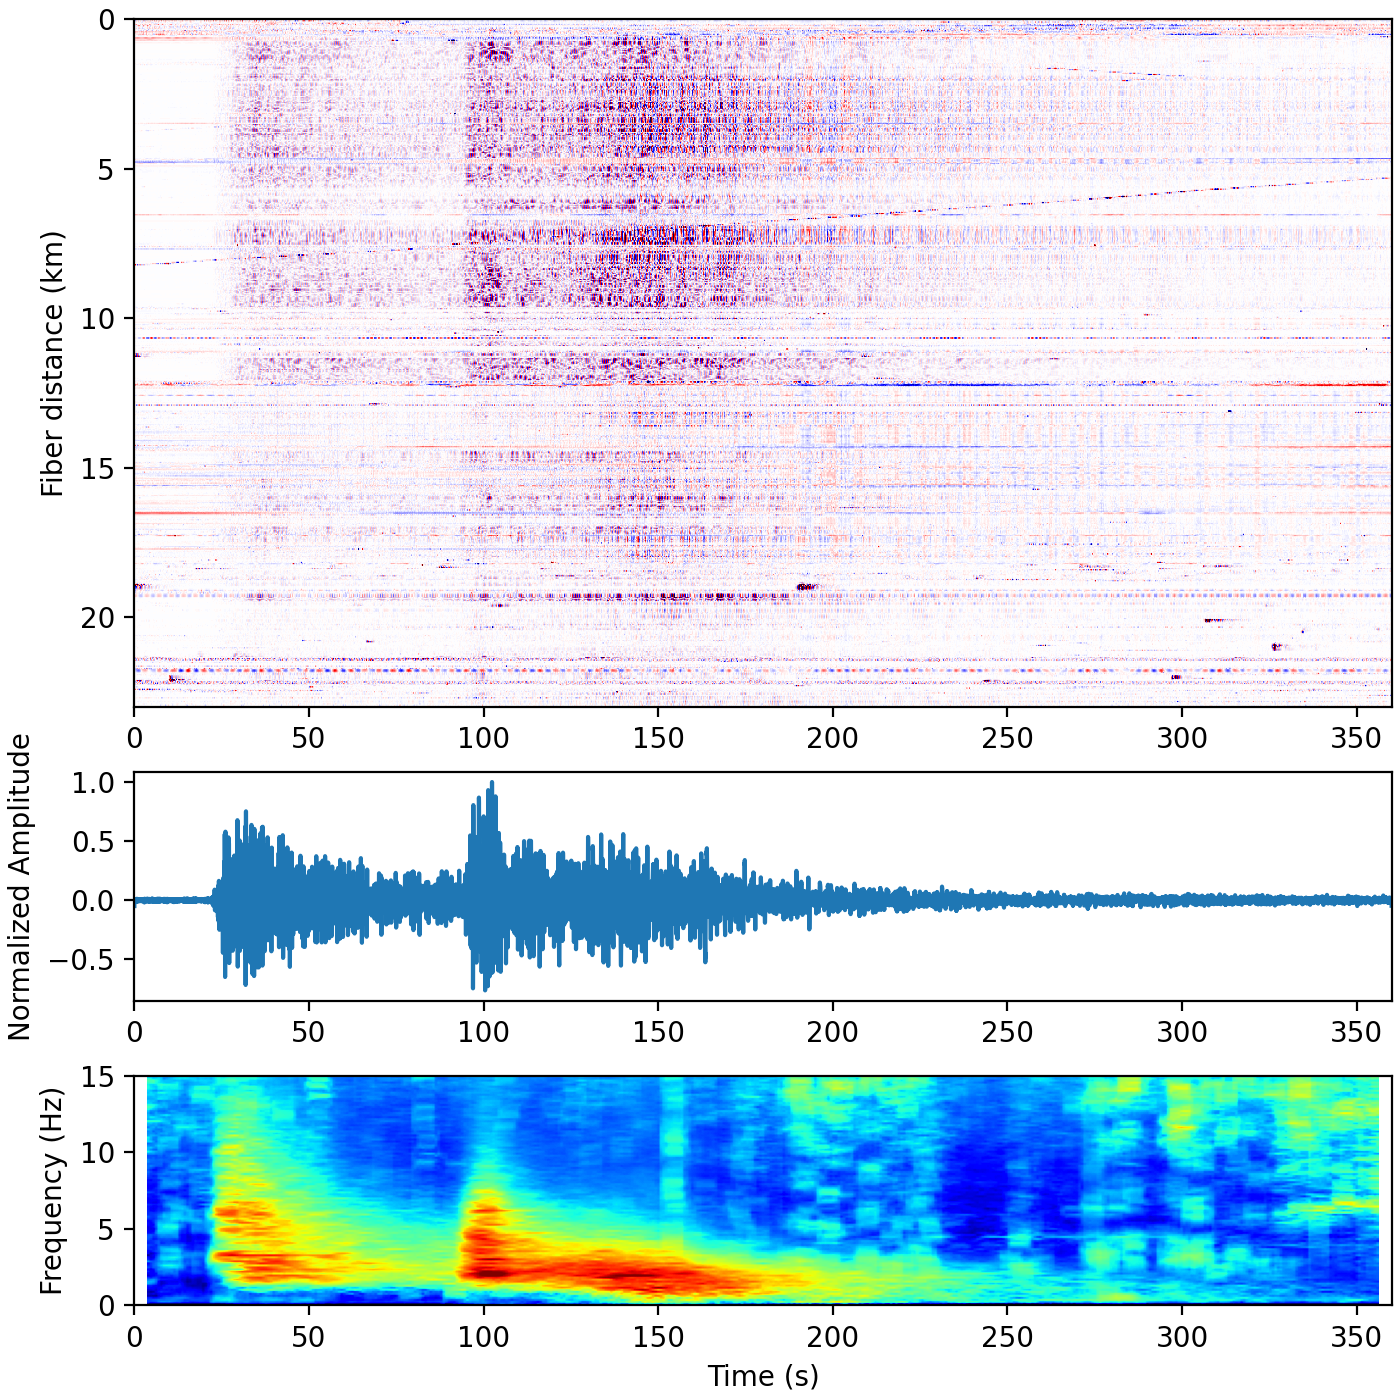

Text(0.5, 0, 'Time (s)')

In [22]:
%matplotlib notebook

import matplotlib.gridspec as gridspec

# fig,ax = plt.subplots(ncols=1, nrows=5, ,figsize=[9,6], constrained_layout=True)

# fax1 = fig3.add_subplot(gs[0, :])

fig = plt.figure(figsize=[7,7], constrained_layout=True)
gs = fig.add_gridspec(5,1)

ax1 = fig.add_subplot(gs[:3,0])

data_plot = data1[:, :]

data_plot /= data_plot.std(axis=1, keepdims=True)
clim = data_plot.std() * 3
extent=[0, data_plot.shape[1]*dt, data_plot.shape[0]*dx/1000., 0]
ax1.imshow(data_plot[::10,:], aspect='auto', cmap='seismic', vmin=-clim, vmax=clim,
          extent=extent)
ax1.set_ylabel('Fiber distance (km)')

ax2 = fig.add_subplot(gs[3,0])
ax3 = fig.add_subplot(gs[4,0])

ax2.plot(np.arange(len(data1[1000,:]))*dt, 
         data1[1000,:] / abs(data1[1000,:]).max())
ax2.set_ylabel('Normalized Amplitude')
ax2.set_xlim([0, data_plot.shape[1]*dt])


clim = np.log10(Spg_all).max()
ax3.imshow(np.log10(Spg_all), aspect='auto', cmap='jet', vmin=-3, vmax=0.5, 
           origin='lower', extent=[t1[0], t1[-1], f1[0], f1[-1]])


ax3.set_ylim([0, 15])
ax3.set_xlim([0, data_plot.shape[1]*dt])
ax3.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('Time (s)')

# plt.ylabel('Frequency (Hz)')
# plt.xlabel('Time (s)')
# plt.show()